In [1]:
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from time import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.callbacks import ModelCheckpoint
import import_ipynb
from functions import * #custom functions

### Functions
---

In [2]:
def metrics(model, x_test):
    y_pred = np.argmax(model.predict(x_test), axis=-1) 
    y_true = np.argmax(y_test, axis=-1) 

    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    auc = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovr')

    print('Accuracy: ', acc)
    print('Precision: ', recall)
    print('Recall: ', precision)
    print('F1-score: ', f1)
    print('AUC: ', auc)

    return acc, recall, precision, f1, auc

def cm(model, model_name, x_test):
    font = {'size': 16}
    labels = ['Normal', 'DoS']

    y_pred = np.argmax(model.predict(x_test), axis=-1) 
    y_true = np.argmax(y_test, axis=-1) 

    confusion = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,6))
    sns.heatmap(confusion, annot=True, linewidths=0.8, xticklabels=labels, yticklabels=labels, fmt='d', cmap='Blues')

    plt.title(f'{model_name} - Simulated Data', fontsize=20) 
    plt.xlabel('Predicted', fontdict=font)
    plt.ylabel('True', fontdict=font)

    plt.savefig(f'img/models/{model_name}', bbox_inches="tight") 

### Load Data
---

In [3]:
data = np.load('data/data_sim.npz', allow_pickle=True)

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
x_val = data['x_val']
y_val = data['y_val']


print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)

x_train shape:  (2063, 18)
y_train shape:  (2063, 2)
x_test shape:  (442, 18)
y_test shape:  (442, 2)
x_val shape:  (443, 18)
y_val shape:  (443, 2)


### ANN Model
---

In [4]:
#Define
ann = Sequential()

ann.add(Dense(input_dim=x_train.shape[1], units=850, activation='relu')) #input & hidden layer 1
ann.add(Dense(units=2, activation='softmax')) #output/prediction layer

ann.summary() #display model architecture information


#Compile
ann.compile(loss="binary_crossentropy",  #they did not specify loss function, assume binary cross entropy
        optimizer=Adam(learning_rate=0.001), #they did not specify learning rate, placeholder value for now
        metrics=["accuracy"])


#Best model callback
model_path = 'trained_models/ann_sim'
checkpoint = ModelCheckpoint(
    filepath=model_path, 
    monitor='val_loss', #save model based on best validation loss
    verbose=0, 
    save_best_only=True,
    mode='min')
callbacks = [checkpoint]


#Fit
start = time()
history = ann.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    epochs=100,
    batch_size=100,
    verbose=1 
)


print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 850)               16150     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1702      
Total params: 17,852
Trainable params: 17,852
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
21/21 [==============================] - 11s 24ms/step - loss: 0.5945 - accuracy: 0.6905 - val_loss: 0.4070 - val_accuracy: 0.8307
INFO:tensorflow:Assets written to: trained_models/ann_sim/assets
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.9168 - val_loss: 0.2192 - val_accuracy: 0.9910
INFO:tensorflow:Assets written to: trained_models/ann_sim/assets
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.9943 -


Training accuracy: 100.0%
Training loss: 0.0003

Validation accuracy: 100.0%
Validation loss: 0.0006


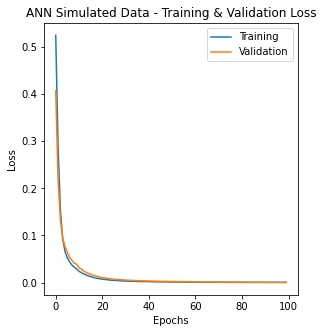

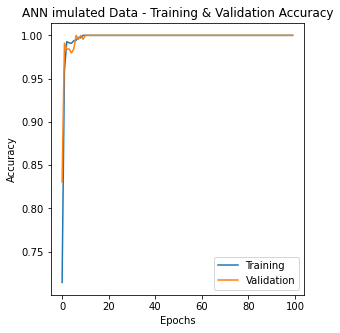

In [5]:
title_loss = 'ANN Simulated Data - Training & Validation Loss'
title_acc = 'ANN imulated Data - Training & Validation Accuracy'
path_loss = 'img/models/ann_loss_sim'
path_acc = 'img/models/ann_acc_sim'

plot_train_val(history, title_acc=title_acc, title_loss=title_loss, path_acc=path_acc, path_loss=path_loss)

In [6]:
acc_ann, recall_ann, precision_ann, f1_ann, auc_ann = metrics(ann, x_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
AUC:  1.0


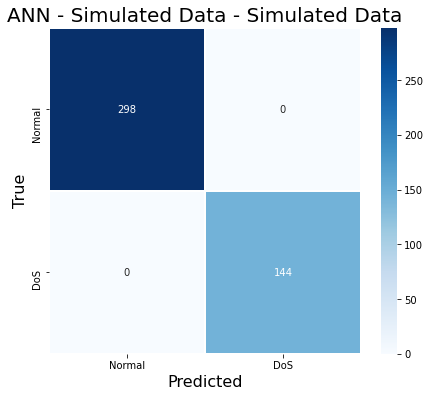

In [7]:
cm(ann, 'ANN - Simulated Data', x_test)

### DNN Model
---

In [8]:
#Define
dnn = Sequential()

dnn.add(Dense(input_dim=x_train.shape[1], units=100, activation='relu')) #input & hidden layer 1
dnn.add(Dense(units=100, activation='relu')) #hidden layer 2
dnn.add(Dense(units=100, activation='relu')) #hidden layer 3
dnn.add(Dense(units=2, activation='softmax')) #output/prediction layer

dnn.summary() #display model architecture information


#Compile
dnn.compile(loss="binary_crossentropy", #they did not specify loss function, assume binary cross entropy
        optimizer=Adam(learning_rate=0.001), #they did not specify learning rate, placeholder value for now
        metrics=["accuracy"])


#Best model callback
model_path = 'trained_models/dnn_sim'
checkpoint = ModelCheckpoint(
    filepath=model_path, 
    monitor='val_loss', #save model based on best validation loss
    verbose=0, 
    save_best_only=True,
    mode='min')
callbacks = [checkpoint]


#Fit
start = time()
history = dnn.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    epochs=100,
    batch_size=100,
    verbose=1
)

print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 22,302
Trainable params: 22,302
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
21/21 [==============================] - 1s 14ms/step - loss: 0.6095 - accuracy: 0.7332 - val_loss: 0.3951 - val_accuracy: 0.8668
INFO:tensorflow:Assets written to: trained_models/dnn_sim/assets
Epoch 2/100
21/21 [======================


Training accuracy: 100.0%
Training loss: 0.0

Validation accuracy: 100.0%
Validation loss: 0.0


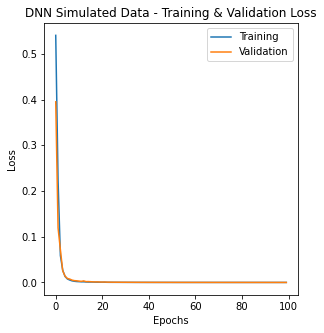

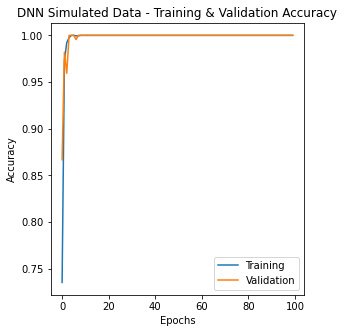

In [9]:
title_loss = 'DNN Simulated Data - Training & Validation Loss'
title_acc = 'DNN Simulated Data - Training & Validation Accuracy'
path_loss = 'img/models/dnn_loss_sim'
path_acc = 'img/models/dnn_acc_sim'

plot_train_val(history, title_acc=title_acc, title_loss=title_loss, path_acc=path_acc, path_loss=path_loss)

In [10]:
acc_dnn, recall_dnn, precision_dnn, f1_dnn, auc_dnn = metrics(dnn, x_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1-score:  1.0
AUC:  1.0


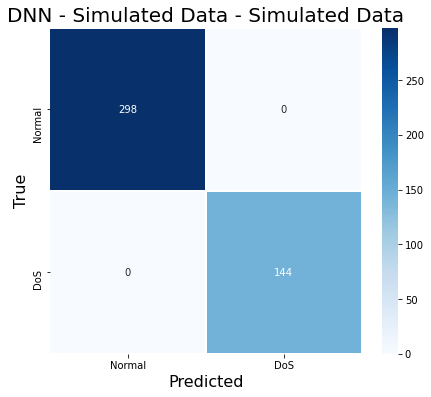

In [11]:
cm(dnn, 'DNN - Simulated Data', x_test)

### Custom Model
---

In [12]:
#Define
custom = Sequential()

custom.add(Dense(input_dim=x_train.shape[1], units=4, activation='relu')) #input & hidden layer 1
custom.add(Dropout(0.4))
custom.add(Dense(units=4, activation='relu')) #hidden layer 2
custom.add(Dense(units=2, activation='softmax')) #output/prediction layer

custom.summary() #display model architecture information


#Compile
custom.compile(loss="binary_crossentropy", 
        optimizer=Adam(learning_rate=0.001), 
        metrics=["accuracy"])


#Best model callback
model_path = 'trained_models/custom_sim'
checkpoint = ModelCheckpoint(
    filepath=model_path, 
    monitor='val_loss', #save model based on best validation loss
    verbose=0, 
    save_best_only=True,
    mode='min')
callbacks = [checkpoint]


#Fit
start = time()
history = custom.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    epochs=50,
    batch_size=50,
    verbose=1 
)


print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 76        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 10        
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
42/42 [==============================] - 1s 7ms/step - loss: 0.7883 - accuracy: 0.5059 - val_loss: 0.6880 - val_accuracy: 0.5418
INFO:tensorflow:Assets written to: trained_models/custom_sim/assets
Epoch 2/50
42/42 [============================


Training accuracy: 94.571%
Training loss: 0.162

Validation accuracy: 99.54899999999999%
Validation loss: 0.0244


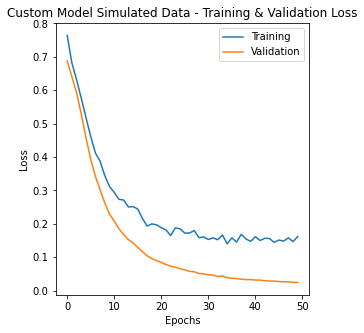

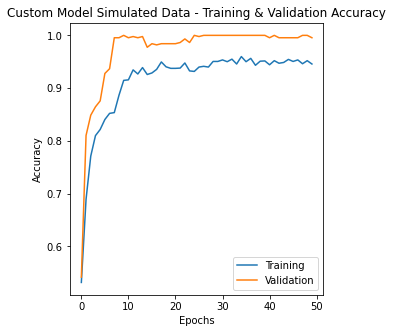

In [13]:
title_loss = 'Custom Model Simulated Data - Training & Validation Loss'
title_acc = 'Custom Model Simulated Data - Training & Validation Accuracy'
path_loss = 'img/models/custom_loss_sim'
path_acc = 'img/models/custom_acc_sim'

plot_train_val(history, title_acc=title_acc, title_loss=title_loss, path_acc=path_acc, path_loss=path_loss)

In [14]:
acc_custom, recall_custom, precision_custom, f1_custom, auc_custom = metrics(custom, x_test)

Accuracy:  0.997737556561086
Precision:  0.997737556561086
Recall:  0.9977531596192853
F1-score:  0.9977395696101171
AUC:  0.9983221476510067


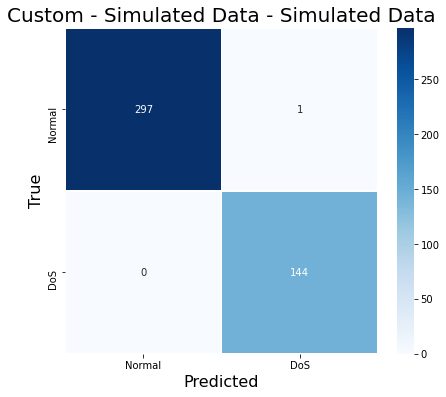

In [15]:
cm(custom, 'Custom - Simulated Data', x_test)

### Comparion Performance
---

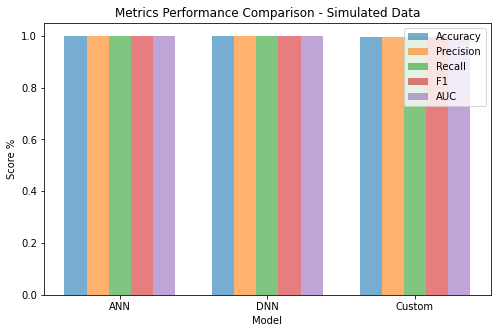

In [16]:
#Bar plot
models = ['ANN','DNN','Custom']
acc = [acc_ann, acc_dnn, acc_custom]
prec = [precision_ann, precision_dnn, precision_custom]
rec = [recall_ann, recall_dnn, recall_custom]
f1 = [f1_ann, f1_dnn, f1_custom]
auc = [auc_ann, auc_dnn, auc_custom]

offset = 0.15
width = 0.15
  
x_axis = np.arange(len(models))
  
plt.figure(figsize=(8, 5))
plt.bar(x_axis, acc, width, label = 'Accuracy', alpha=0.6)
plt.bar(x_axis+offset, prec, width, label = 'Precision', alpha=0.6)
plt.bar(x_axis+offset*2, rec, width, label = 'Recall', alpha=0.6)
plt.bar(x_axis+offset*3, f1, width, label = 'F1', alpha=0.6)
plt.bar(x_axis+offset*4, auc, width, label = 'AUC', alpha=0.6)

plt.xticks(x_axis+width*2, models)
plt.xlabel('Model')
plt.ylabel('Score %')
plt.title('Metrics Performance Comparison - Simulated Data')
plt.legend()
plt.show()